# Matrix Factorization - Collaborative Filtering

In [10]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

%matplotlib inline

In [293]:
class MatrixFactorizationCF():
  """
  A class used to encapsulate Matrix Factorization Collaborative Filtering

  ...

  Attributes
  ----------
  R : np array
        Ratings matrix
    dim : int
        number of dimensions to compute
    alpha : int, optional
        learning rate (default is .01)
    beta : int, optional
        learning rate (default is .02)
    n_iter : int, optional
        learning rate (default is 100)

  Methods
  -------
  mse()
      Calculates Mean Sq. Error
  """
  def __init__(self, R, dim, alpha = .01, beta=.02, n_iter = 100):
    """
    Parameters
    ----------
    R : np array
        Ratings matrix
    dim : int
        number of dimensions to compute
    alpha : int, optional
        learning rate (default is .01)
    beta : int, optional
        learning rate (default is .02)
    n_iter : int, optional
        learning rate (default is 100)
    """
    self.R = R
    self.n_users, self.n_items = R.shape
    self.n_dim = dim
    self.n_iter = n_iter
    self.alpha = alpha
    self.beta = beta

  def train(self):
    #Initalize factor matrices
    _scale = 1.0/self.n_dim
    self.U = np.random.normal(loc=0.0, scale =_scale, size=(self.n_users, self.n_dim))
    self.I = np.random.normal(loc = 0.0, scale= _scale, size=(self.n_items, self.n_dim))

    # R_i_j > 0 as D_train
    self.train = [
                  (i,j,self.R[i,j])
                  for i in range(self.n_users)
                  for j in range(self.n_items)
                  if self.R[i,j] > 0
    ]

    #Train
    #fig,ax = plt.subplots(1,1)
    #ax.set_xlabel('X') ; ax.set_ylabel('MSE')
    mse_errors = []
    for i in tqdm(range(self.n_iter)):
      np.random.shuffle(self.train)
      self.optim_sgd()
      mse = self.mse()
      mse_errors.append((i,mse))

      #f = lambda x,index:list( i[index] for i in x)
      #xs = f(mse_errors,0)
      #ys = f(mse_errors,1)
      #self.plot_dynamic(xs, ys, ax, fig)
    
    return mse_errors

  def mse(self):
    xs, ys = self.R.nonzero() #get indices of non-zero
    predicted = self.get_matrix()
    err = 0
    for x,y in zip(xs, ys):
      err = err + pow(self.R[x,y] - predicted[x,y], 2)
      return np.sqrt(err)

  def get_rating(self, i, j):
    pred = np.dot(self.U[i,:], self.I[j, :].T) # R_i_j^ = U_i . (I_j)^T
    return pred

  def get_matrix(self):
    return self.U.dot(self.I.T) # R^ = U . I^T

  def optim_sgd(self):
    for i,j,r in self.train:
      pred = self.get_rating(i,j)
      err = (r - pred) * 1.0

      U_i = self.U[i,:] # storing U vector to use in 2nd update rule

      # Update Rule
      self.U[i,:] += self.alpha * (err *self.I[j,:] - self.beta * self.U[i,:])
      self.I[j,:] += self.alpha * (err * U_i - self.beta * self.I[j,:])

  def plot_dynamic(self,x, y, ax, fig):
    ax.plot(x, y, 'b')
    fig.canvas.draw()




In [84]:
def weighted_choice(weighted_ratings):
   total = sum(w for c, w in weighted_ratings)
   r = np.random.uniform(0, total)
   upto = 0
   for c, w in weighted_ratings:
      if upto + w >= r:
         return c
      upto += w

In [93]:
#Create ratings matrix - sparse
weighted_ratings = [(0,70), (1,4), (2,6), (3,12), (4,6),(5,2)]

Ratings = np.array(
  [ weighted_choice(weighted_ratings) for i in range(990)] # or np.random.choice([1,2,3,4,5], p=[0.14, 0.1, 0.66, 0.08, 0.02])
).reshape(99,10)

In [92]:
Ratings[:10,:]

array([[0, 0, 0, 0, 0, 3, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 3, 3, 0, 0, 0, 0, 2, 0, 3],
       [0, 1, 0, 0, 1, 0, 0, 0, 4, 1],
       [0, 2, 0, 2, 0, 0, 0, 0, 0, 3],
       [0, 0, 0, 4, 0, 4, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 4, 2, 2, 2],
       [4, 3, 0, 0, 2, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 3, 3, 5, 2, 0, 4],
       [0, 0, 0, 0, 5, 0, 0, 3, 0, 0]])

In [294]:
matrixFactCF = MatrixFactorizationCF(R=Ratings, dim=6 , alpha=.01, beta=.02,n_iter=1000)

In [295]:
mse_err = matrixFactCF.train()

In [296]:
matrixFactCF.get_matrix()[0:10,:]

array([[1.25364997, 1.59903877, 1.99020698, 2.97427335, 1.61610666,
        1.79967145, 1.58709417, 2.13449905, 1.99030867, 1.6422921 ],
       [3.44389886, 3.94185351, 3.0604286 , 2.34352125, 1.97746632,
        3.00054904, 2.67095288, 3.56503582, 2.3441384 , 2.43189741],
       [2.07656153, 2.0361934 , 3.97212339, 1.89979716, 2.97924692,
        2.82752449, 1.83236285, 2.12350216, 2.28818862, 2.47443335],
       [2.12109784, 2.46472615, 2.13021366, 2.98190919, 1.6378402 ,
        1.11366112, 2.48598339, 2.98861095, 3.0508116 , 2.95850009],
       [2.97197775, 1.06673289, 2.23522038, 1.88164449, 3.04774312,
        2.93344818, 1.95806302, 0.8030966 , 2.0311851 , 0.74944149],
       [2.97613352, 1.5966259 , 1.14124058, 1.04345138, 1.75248188,
        1.99297526, 1.16152516, 1.68309932, 1.78776511, 0.60407704],
       [2.97308338, 2.00775771, 2.96248564, 1.52572332, 2.79905736,
        2.61167646, 1.69711919, 2.17345761, 2.49893479, 1.91221962],
       [0.89160891, 1.52228803, 1.2772228

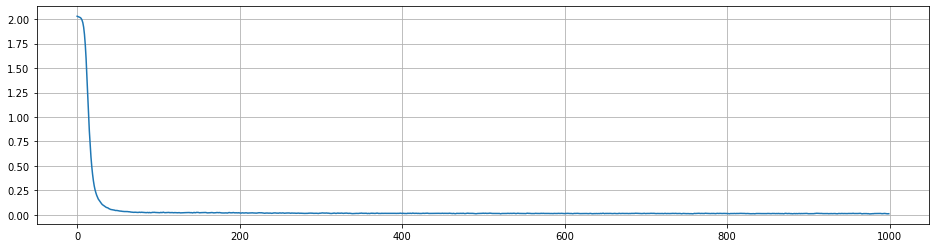

In [297]:
f = lambda x,index:list( i[index] for i in x)
xs = f(mse_err,0)
ys = f(mse_err,1)
plt.figure(figsize=((16,4)))
plt.plot(xs, ys)
plt.grid()
plt.show()